___
___
___
# Light GBM
___
___
___
LightGBM (Light Gradient Boosting Machine) est une bibliothèque open-source de boosting développée par *Microsoft*. **Elle est conçue pour être rapide et performante**, en particulier sur de grands ensembles de données et sur des tâches d'apprentissage automatique complexes. LightGBM est particulièrement populaire dans les compétitions de science des données en raison de sa rapidité et de sa précision.


## 1. Caractéristiques principales de LightGBM :
* a. **Boosting :**
LightGBM appartient à la famille des méthodes de boosting. Il construit une séquence de modèles faibles (généralement des arbres de décision peu profonds) et les combine pour former un modèle fort.

* b. **Rapidité :**
LightGBM est optimisé pour être rapide et efficace. Il utilise des techniques telles que le binning, le parallélisme et le pruning pour accélérer l'entraînement du modèle.

* c. **Histogramme basé sur le partitionnement :**
LightGBM utilise un histogramme basé sur le partitionnement pour construire les arbres de décision. Cela permet de regrouper les valeurs des caractéristiques en intervalles (bins) pour accélérer le processus d'apprentissage.

* d. **Light :**
Le terme "Light" dans LightGBM fait référence à la légèreté du modèle et à la rapidité de l'algorithme. Il est adapté à un large éventail d'applications, y compris celles où les données sont volumineuses.


## 2. Principes de fonctionnement :
* a. **Gradient Boosting :**
Comme d'autres algorithmes de boosting, LightGBM construit des arbres de manière séquentielle en corrigeant les erreurs du modèle précédent.

* b. **Leaf-wise Growth :**
LightGBM adopte une stratégie de croissance feuille par feuille (leaf-wise growth) pour construire les arbres. Au lieu de faire grandir l'arbre de manière niveaux par niveaux, il choisit la feuille qui donne la plus grande réduction de l'objectif lors de chaque division.

* c. **Optimisation par les histogrammes :**
LightGBM utilise des histogrammes pour trouver la meilleure façon de diviser les données lors de la construction de chaque arbre. Cela réduit le coût computationnel par rapport à des approches comme le "full-sorting".


## 3. Utilisation de LightGBM :
* a. **Installation :**
Vous pouvez installer LightGBM en utilisant la commande pip : pip install lightgbm

* b. **Intégration avec scikit-learn :**
LightGBM s'intègre bien avec scikit-learn, ce qui facilite son utilisation dans des pipelines d'apprentissage automatique.

* c. **Paramètres importants :**
LightGBM offre de nombreux paramètres pour ajuster le modèle. Certains paramètres clés incluent learning_rate, num_leaves, max_depth, min_child_samples, etc.


## 4. Conclusion :

LightGBM est une bibliothèque puissante et performante pour les tâches de boosting. Sa rapidité en fait un choix populaire, en particulier dans les compétitions de science des données. En l'intégrant avec scikit-learn et en ajustant ses paramètres, vous pouvez construire des modèles performants pour diverses applications d'apprentissage automatique.

## sources
* https://www.youtube.com/watch?v=n_ZMQj09S6w
* https://github.com/microsoft/LightGBM
* https://lightgbm.readthedocs.io/en/stable/

*Code récupéré ici :*
https://github.com/bnsreenu/python_for_microscopists/blob/master/196_lightGBM_feature_selection_breast_cancer.py

Les commentaires en anglais ne sont pas traduits

* **@author: Sreenivas Bhattiprolu**
* LGBM and how it compares to XGBoost
* https://lightgbm.readthedocs.io/en/latest/
* pip install lightgbm
* Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
* https://youtu.be/n_ZMQj09S6w


___
___
___
## Exemple : utilisation du dataset Titanic et comparaison de LightGBM avec XGBoost
___
___
___
### Imports

In [344]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime # juste pour chronométrer
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix # roc_auc_score pour quantifier la matrice de confusion
# En résumé, le score AUC-ROC évalue la capacité d'un modèle à bien classer les exemples positifs par rapport
# aux exemples négatifs à différents seuils de probabilité, et il fournit un nombre unique pour mesurer cette performance,
# où un score plus élevé indique une meilleure performance.
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb # librairie LightGBM à installer au préalable
import xgboost as xgb # pour comparer à XGBoost

# Importing the dataset
df = pd.read_csv("datasets/titanic.csv")

print("Taille du dataset :", df.shape)

Taille du dataset : (1310, 14)


In [345]:
# df['survived'] = df['survived'].fillna(df['survived'].mean())
df = df.dropna(subset=['survived'])
df.shape

(1309, 14)

### création du dataframe *Y* + nettoyage

In [346]:
#Rename Dataset to Label to make it easy to understand
y = df[['survived']]
y = y.rename(columns={'survived':'Label'})


####### Replace categorical values with numbers########
y['Label'].value_counts()

#Define the dependent variable that needs to be predicted (labels)
y = y["Label"].values

# Encoding categorical data
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y)

# affichage de la différence entre y et Y
print(y[20:30])

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


### création du dataframe *X* + nettoyage

In [347]:
#Define x and normalize values

#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["survived"], axis=1)

labelencoder = LabelEncoder()
for column in X.columns:
    X[column] = labelencoder.fit_transform(X[column])

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### split des données
Création des *X_train, X_test, y_train, y_test* à partir de *X* et *Y*

In [348]:
##Split data into train and test to verify accuracy after fitting the model. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

___
## Light GBM
___

In [349]:
###################################
# LightGBM

d_train = lgb.Dataset(X_train, label=y_train)

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
lgbm_params = {'learning_rate':0.05, 'boosting_type':'gbdt',    #gbdt or Try dart for better accuracy (it means the best for boosting)
              'objective':'binary',
              'metric':['auc', 'binary_logloss'],
              'num_leaves':100,
              'max_depth':10}

start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 50) #50 iterations. Increase iterations for small learning rates
stop=datetime.now()
execution_time_lgbm = stop-start

#Prediction on test data
y_pred_lgbm=clf.predict(X_test)

#convert into binary values 0/1 for classification
for i in range(0, X_test.shape[0]):
    if y_pred_lgbm[i]>=.5:       # setting threshold to .5
       y_pred_lgbm[i]=1
    else:  
       y_pred_lgbm[i]=0


###################################
# XGBoost
dtrain=xgb.DMatrix(X_train, label=y_train)


#setting parameters for xgboost
parameters={'max_depth':10, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05}


start = datetime.now() 
xg=xgb.train(parameters, dtrain, 50)
stop = datetime.now()

#Execution time of the model 
execution_time_xgb = stop-start

#now predicting the model on the test set 
dtest=xgb.DMatrix(X_test)
y_pred_xgb = xg.predict(dtest) 

#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_xgb[i]>=.5:       # setting threshold to .5 
       y_pred_xgb[i]=1 
    else: 
       y_pred_xgb[i]=0

[LightGBM] [Info] Number of positive: 382, number of negative: 665
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364852 -> initscore=-0.554366
[LightGBM] [Info] Start training from score -0.554366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

___
### Confusion matrix
___

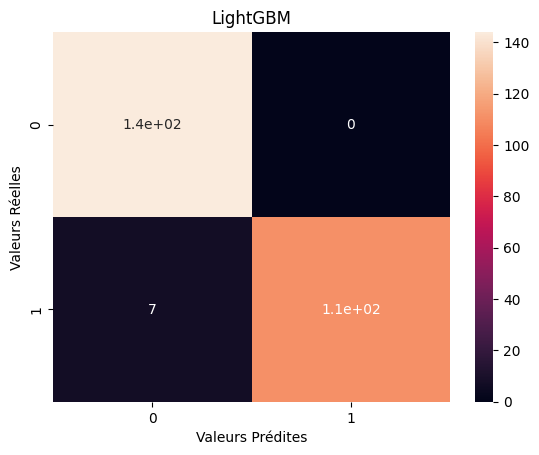

In [350]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True)
plt.title("LightGBM")
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
pass

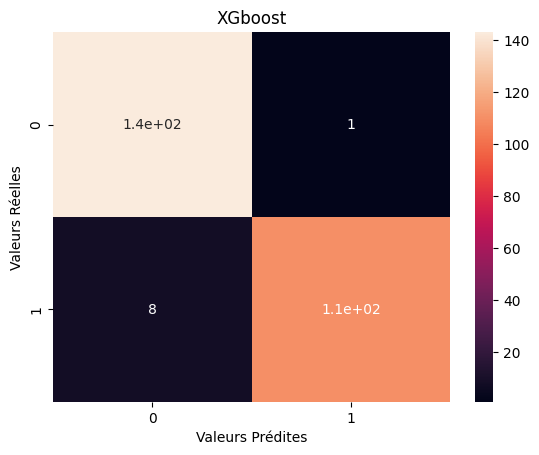

In [351]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)
plt.title("XGboost")
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
pass

In [352]:
################
#SUMMARY
print("################################################")
print("# LGBM execution time is: ", execution_time_lgbm)
print("# XGBoost execution time is: ", execution_time_xgb)
difference_in_seconds = (execution_time_xgb - execution_time_lgbm).total_seconds()
print("# Gain: ", difference_in_seconds)
print("################################################")
print ("# Accuracy with LGBM = ", round(metrics.accuracy_score(y_pred_lgbm,y_test) * 100, 2), '%')
print ("# Accuracy with XGBoost= ", round(metrics.accuracy_score(y_pred_xgb, y_test) * 100, 2))
print("# gain :", round(metrics.accuracy_score(y_pred_lgbm,y_test) * 100 - metrics.accuracy_score(y_pred_xgb, y_test) * 100, 2))
print("################################################")
print("# AUC score with LGBM is: ", round(roc_auc_score(y_pred_lgbm,y_test) * 100, 2))
print("# AUC score with XGBoost is: ", round(roc_auc_score(y_pred_xgb, y_test) * 100, 2))
print("# gain :", round(roc_auc_score(y_pred_lgbm,y_test) * 100 - roc_auc_score(y_pred_xgb, y_test) * 100, 2))
print("################################################")

################################################
# LGBM execution time is:  0:00:00.449368
# XGBoost execution time is:  0:00:00.134448
# Gain:  -0.31492
################################################
# Accuracy with LGBM =  97.33 %
# Accuracy with XGBoost=  96.56
# gain : 0.76
################################################
# AUC score with LGBM is:  97.68
# AUC score with XGBoost is:  96.9
# gain : 0.78
################################################


___
___
___
## Exercice avec le dataset "wine"
___
___
___
A partir du dataset "Wine" (wine.csv), faire des prédictions sur la note à donner d'un vin (feature "points").

Le code est pré-implanté de la même manière que l'exemple ci-dessus.

Tâches à faire :
* explorer les données
* la cible étant la note donnée à un vin, elle sera considérée comme catégorielle
* afficher les résultats suivants : La matrice de confusion, Accuracy, AUC score
* tester des hyperparamètres, sources : https://lightgbm.readthedocs.io/en/latest/Parameters.html | https://towardsdatascience.com/beginners-guide-to-the-must-know-lightgbm-hyperparameters-a0005a812702

In [353]:
# Importing the dataset
df = pd.read_csv("datasets/wine.csv")

print("Taille du dataset :", df.shape)

Taille du dataset : (129971, 14)


In [369]:
# exploration des données
display(df.head(2))
print("##################################################")
print("valeurs uniques :", df['points'].unique())

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


##################################################
valeurs uniques : [ 87  86  85  88  92  91  90  89  83  82  81  80 100  98  97  96  95  93
  94  84  99]


In [361]:
# split du dataset
X = df.drop(labels = ["Unnamed: 0", "points"], axis=1)
y = df['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Taille des jeux de données :", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Taille des jeux de données : (103976, 12) (103976,) (25995, 12) (25995,)
